In [3]:
# Download Nanum Gothic font
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

import matplotlib.font_manager as fm
import os

# Find the font file
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

if len(font_files) > 0:
    nanum_gothic_font_path = font_files[0]
    print(f"Found Nanum Gothic font at: {nanum_gothic_font_path}")
else:
    nanum_gothic_font_path = None
    print("Nanum Gothic font not found.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Found Nanum Gothic font at: /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/IPython/core

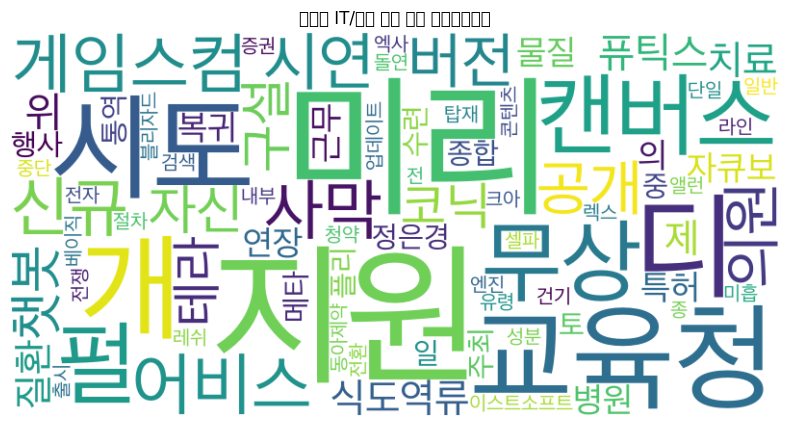

In [2]:
# 예제 : 네이버 뉴스 기사 제목 수집 및 워드클라우드 시각화
!pip install requests beautifulsoup4 wordcloud konlpy --quiet

import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 네이버 뉴스에서 IT/과학 카테고리 기사 1페이지 수집
url = "https://news.naver.com/main/list.naver?mode=LSD&mid=sec&sid1=105"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")
titles = [t.text.strip() for t in soup.select('.type06_headline a') if t.text.strip()]

# 형태소 분석(명사 추출)
okt = Okt()
nouns = []
for title in titles:
    nouns += okt.nouns(title)

# 워드클라우드 - Mac용 한글 폰트 경로
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', width=800, height=400, background_color='white').generate(' '.join(nouns))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('네이버 IT/과학 뉴스 제목 워드클라우드')
plt.show()